# Titanic Survival Project

Steps:-
1. Import the librabries
2. Import the dataset
3. Perform the Data Analysis (DM, DE, DC, DV, EDA)
4. Feature Scaling[Optional]
5. Encoding
6. Feature selection
7. Choosing the model - Logistic Regression
8. Split the Data - CV(only split dont go for accuracy)
9. Traning the model
10. Testing the model
11. Performace - Confusion Metric

In [1]:
# Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix

Import the dataset
link:-"https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")

Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

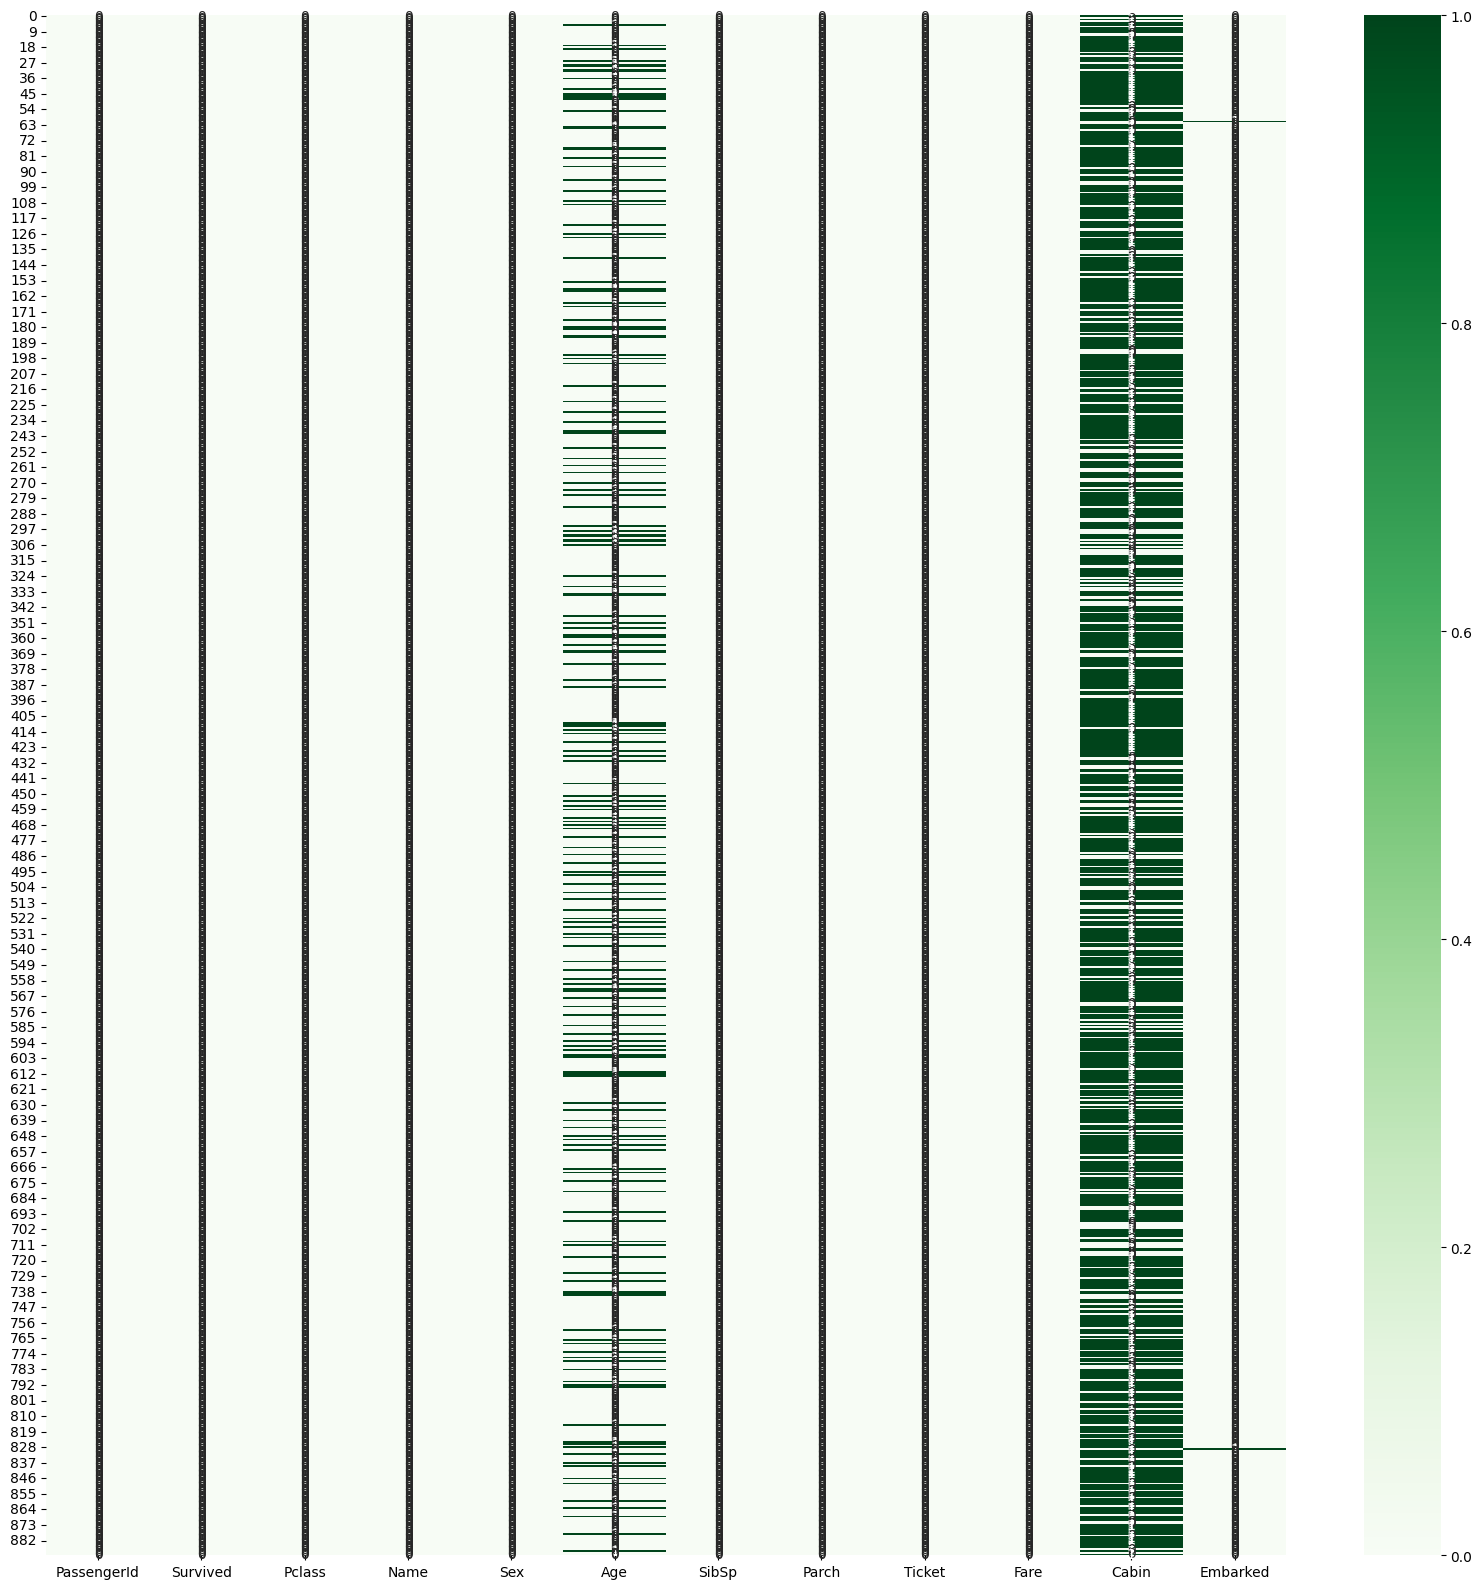

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), annot= True , cmap= 'Greens')

In [9]:
#% of null values in age
print((df['Age'].isnull().sum() / len(df.Age))*100,'%')

19.865319865319865 %


In [10]:
#% of null values in Cabin
print((df['Cabin'].isnull().sum() / len(df.Cabin))*100,'%')

77.10437710437711 %


In [11]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
#Drop the cabin
df.drop(columns='Cabin',axis=1, inplace=True)

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [14]:
df.Embarked.unique()
# S - Southampton
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [16]:
# Show all the Embarked values where the Pclass = 1
df.loc[df.Pclass ==1 ,'Embarked'].value_counts()

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

In [17]:
# Show all the Embarked values where the Pclass = 2
df.loc[df.Pclass == 2 ,'Embarked'].value_counts()

Embarked
S    164
C     17
Q      3
Name: count, dtype: int64

In [18]:
# Show all the Embarked values where the Pclass = 3
df.loc[df.Pclass == 3 ,'Embarked'].value_counts()

Embarked
S    353
Q     72
C     66
Name: count, dtype: int64

In [19]:
# Show all the Embarked values where the Fare = 80
df.loc[df.Fare == 80 ,'Embarked'].value_counts()

Series([], Name: count, dtype: int64)

In [20]:
df.dropna(subset=['Embarked'], inplace=True)

In [21]:
df.Embarked.isnull().sum()

np.int64(0)

In [22]:
#Mean , median, mode of Age column
print(df.Age.mean()) # dont use because of outliers
print(df.Age.median())
print(df.Age.mode()) # will choose the max repeated value

29.64209269662921
28.0
0    24.0
Name: Age, dtype: float64


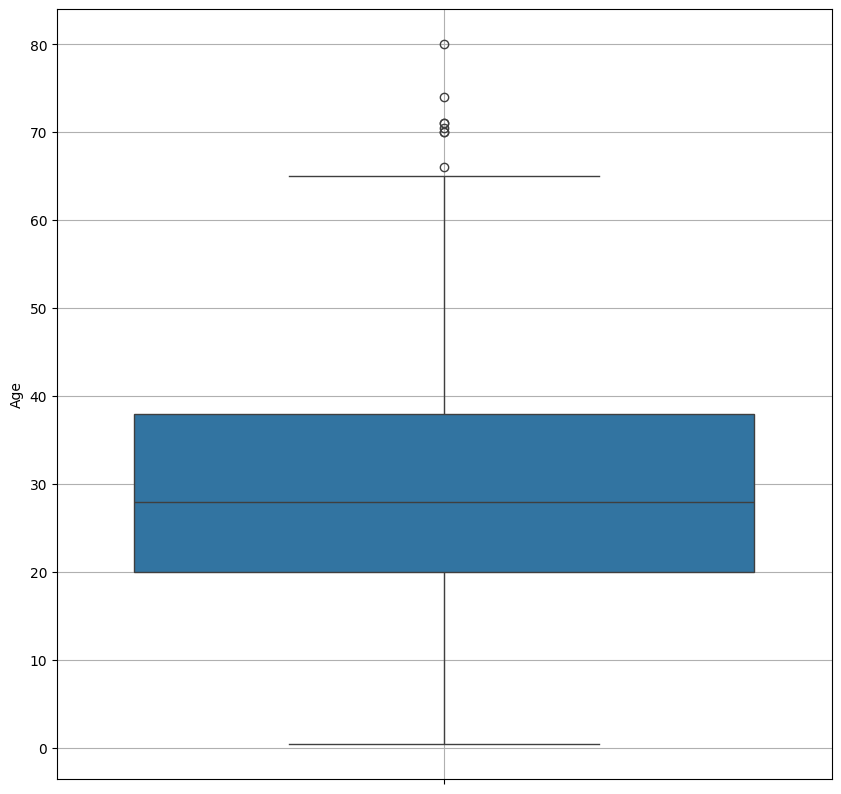

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(df['Age'])
plt.grid()

In [24]:
df.Age.fillna(value=df.Age.median(), inplace=True)

C:\Users\Vipul\AppData\Local\Temp\ipykernel_18228\972478713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(value=df.Age.median(), inplace=True)


In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
# Drop Columns - 'PassengerId','Name','Ticket'
df.drop(columns=['PassengerId','Name','Ticket'], inplace = True)

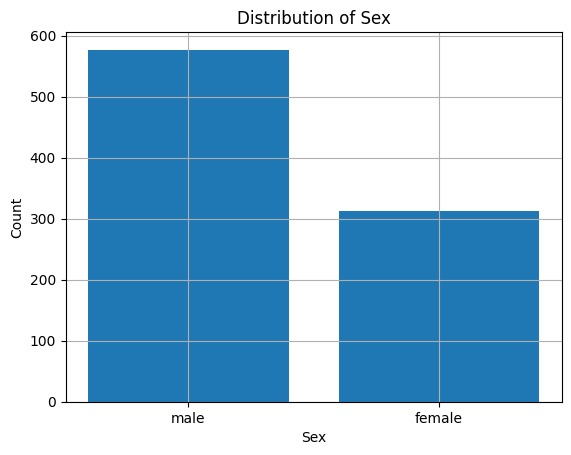

In [28]:
#PLot graph strengh of make vs strength of female
# Value counts for the 'Sex' column
sex_counts = df['Sex'].value_counts()

# Plot
plt.bar(sex_counts.index, sex_counts.values)
plt.grid()
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

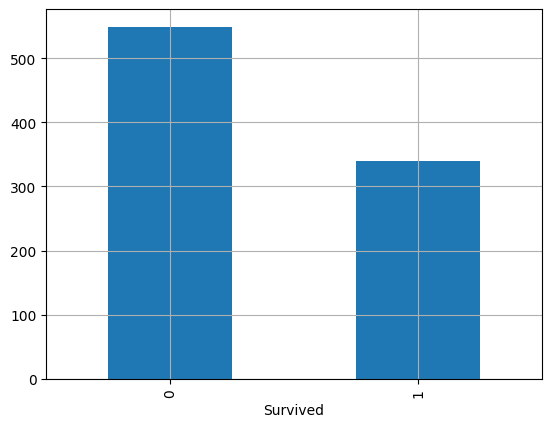

In [29]:
#strength of aurvival and strength of non survival
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

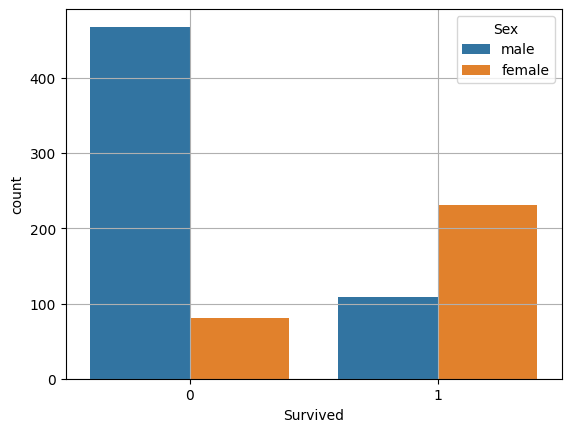

In [30]:
#Plot A graph to find of the survival & non survival rate w.r.t sex
sns.countplot(x='Survived', data = df, hue='Sex')
plt.grid()

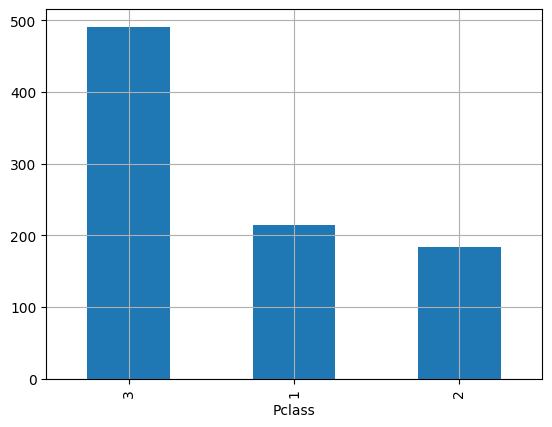

In [31]:
#plot a graph to find the strength of he Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

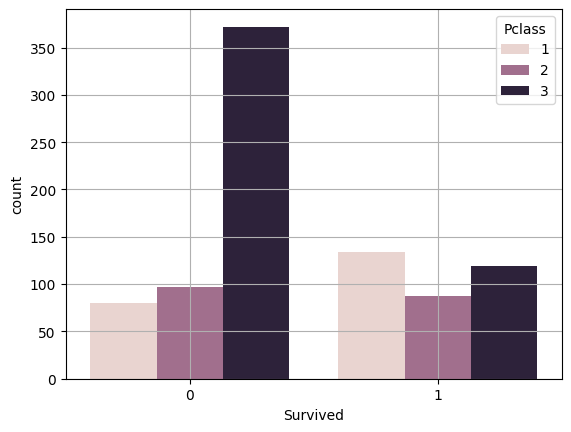

In [32]:
#Plot A graph to find of the survival & non survival rate w.r.t Pclass
sns.countplot(x='Survived', data = df, hue='Pclass')
plt.grid()

In [33]:
#Label Encoding for the sex
from sklearn.preprocessing import LabelEncoder

In [34]:
enc = LabelEncoder()

In [35]:
df.Sex = enc.fit_transform(df.Sex)

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [37]:
df['Age']= df['Age'].astype(int)

In [38]:
df['Fare'] = round(df.Fare,2)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 62.5+ KB


In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [47]:
#OneHot encoding for the columns emabarked
newdf = df.copy()

In [50]:
new = df.copy()

In [48]:
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [ ]:
pd.get_dummies(newdf['Embarked'], dtype=int)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [53]:
df = pd.concat([new, pd.get_dummies(newdf['Embarked'], dtype=int)],axis=1)

In [54]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [55]:
df.drop(columns=['Embarked', 'C'], axis=1, inplace=True)

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    int64  
 8   S         889 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.5 KB


Feature Importance /Feature Selection

<Axes: >

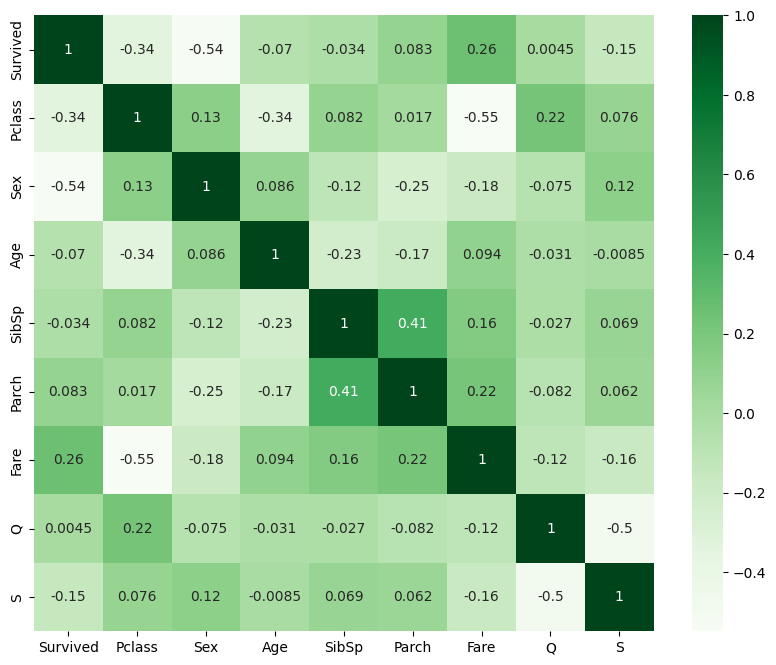

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True, cmap = 'Greens')

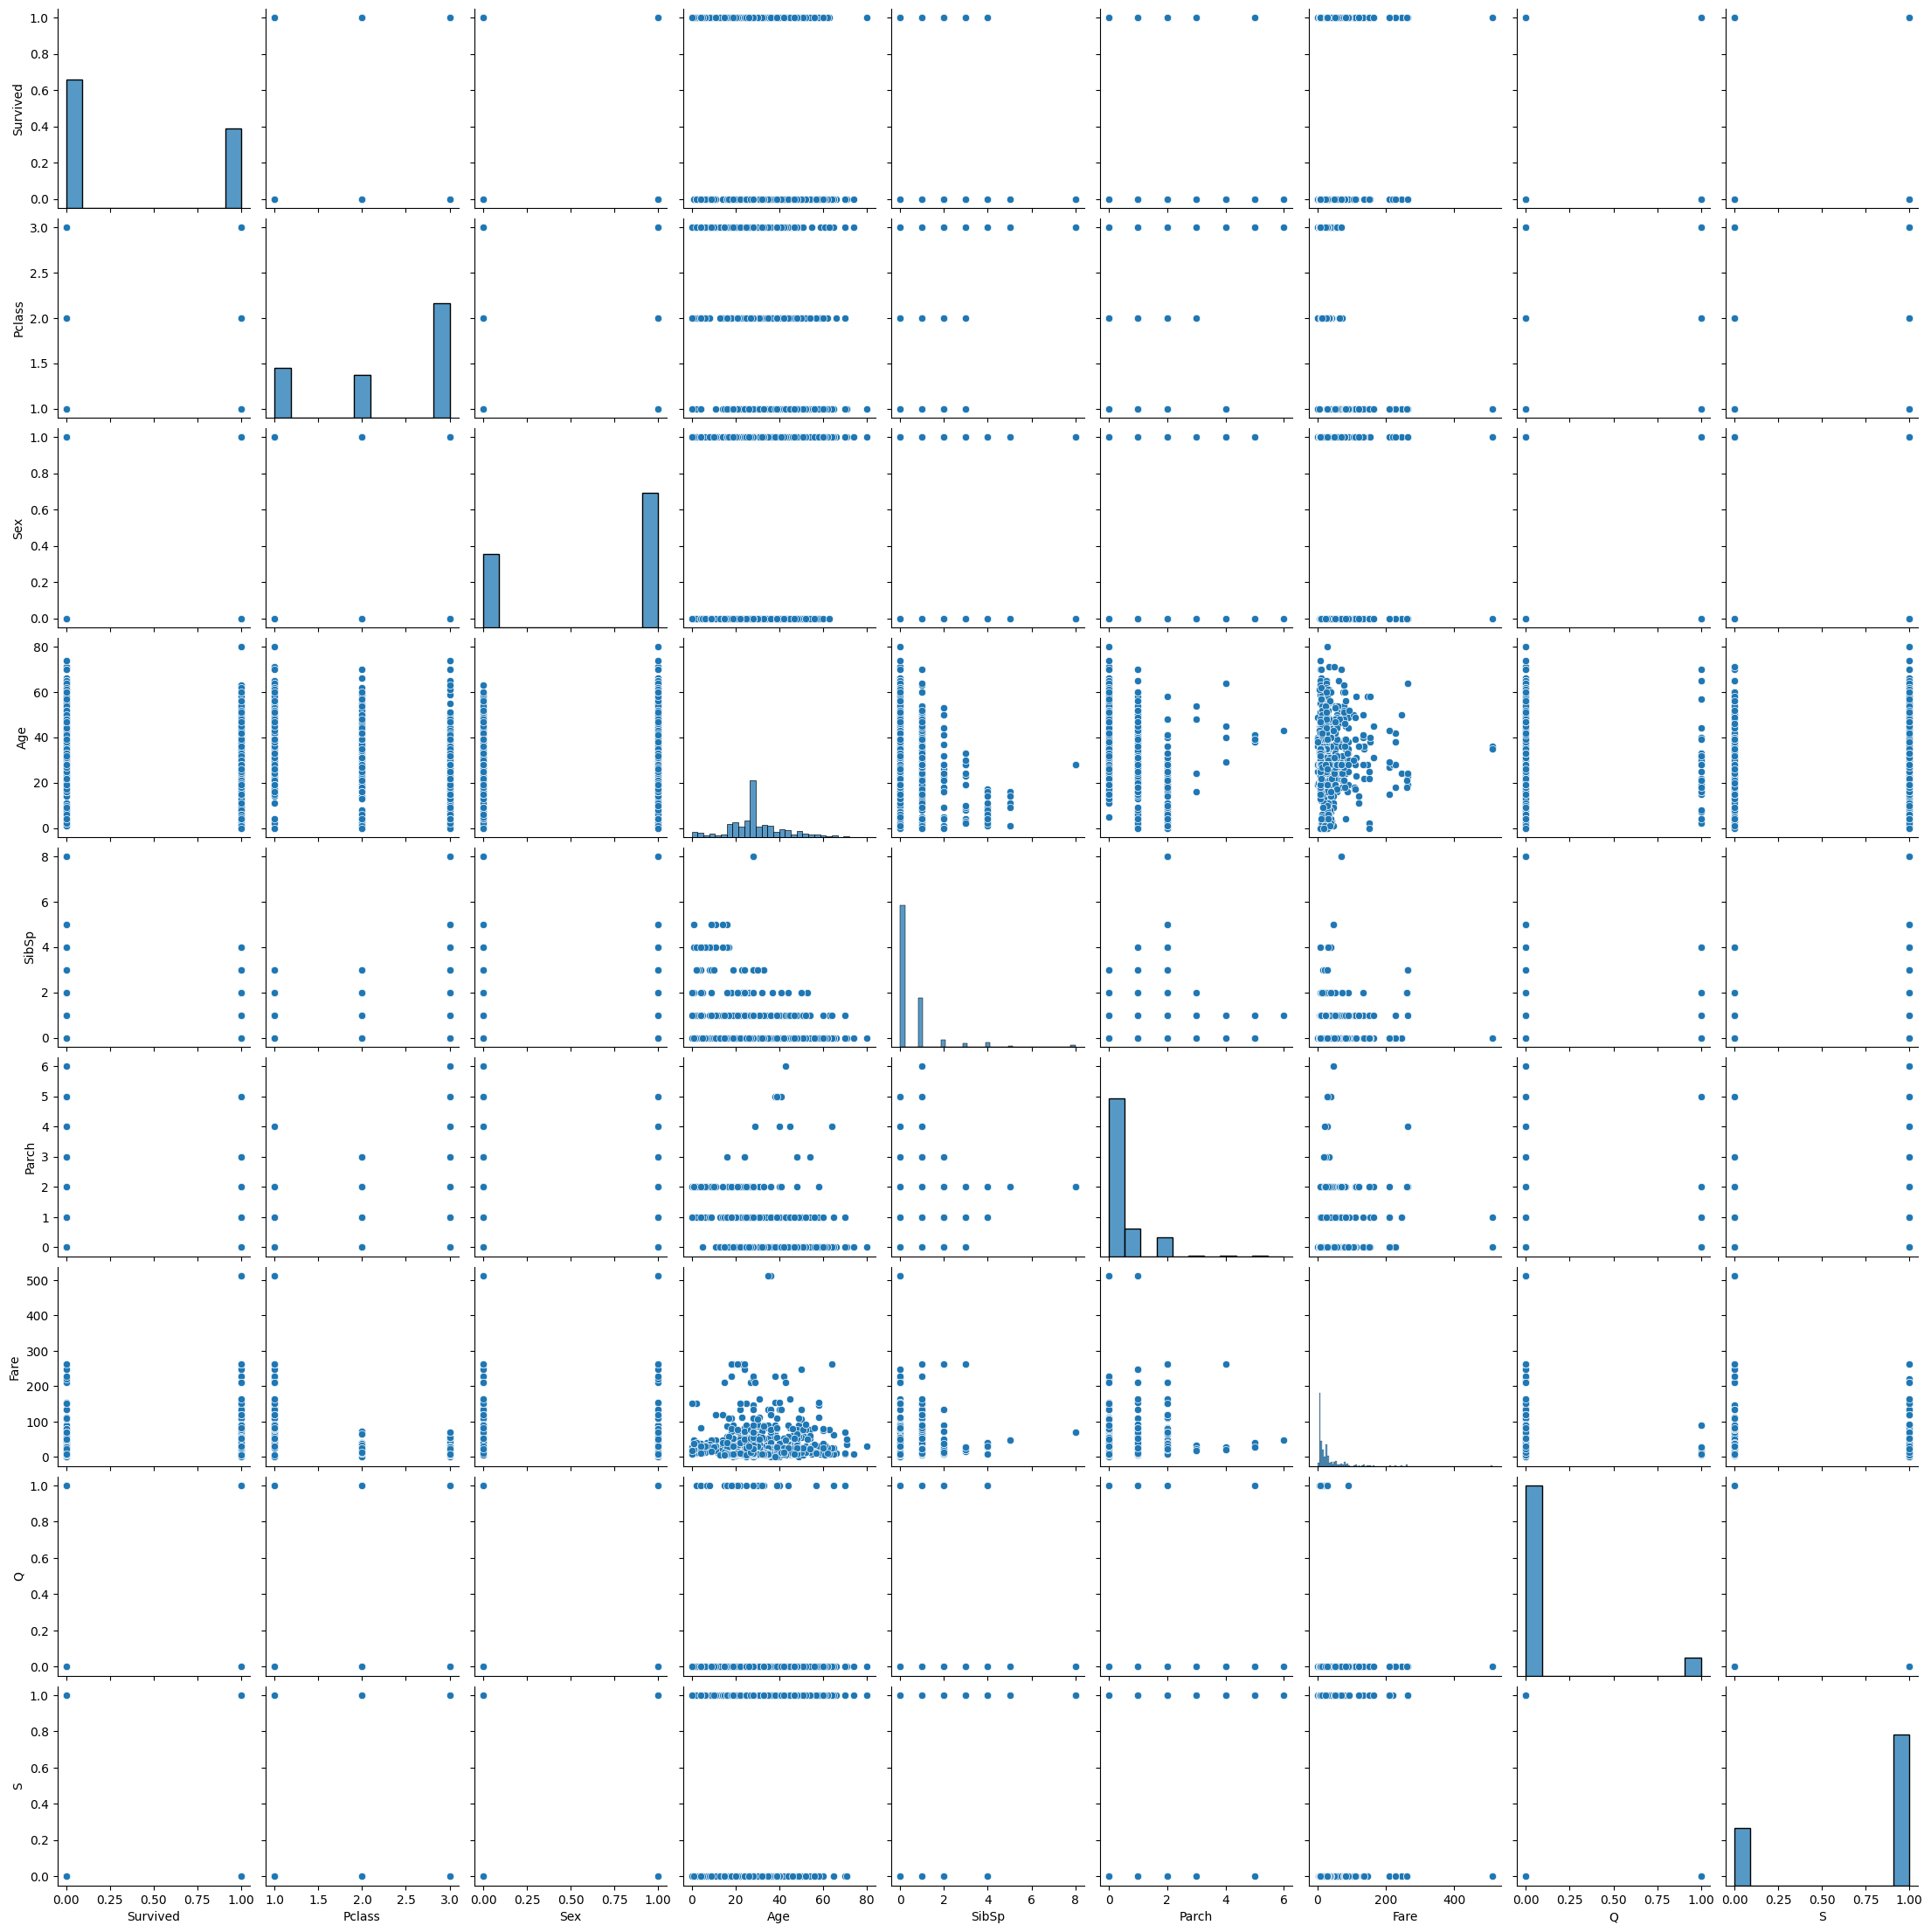

In [61]:
sns.pairplot(df)

In [62]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
feat = ExtraTreesClassifier()

In [65]:
feat.fit(X,y)

ExtraTreesClassifier()

In [66]:
feat.feature_importances_

array([0.11019161, 0.28774538, 0.24016465, 0.04734335, 0.04294305,
       0.24154222, 0.00889943, 0.02117031])

<Axes: >

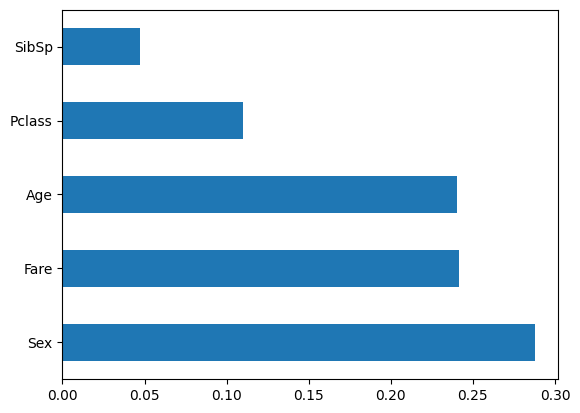

In [72]:
feat_imp = pd.Series(feat.feature_importances_, index = X.columns)
largest = feat_imp.nlargest(5)
# plt.barh(largest, largest.index)
largest.plot(kind='barh')

In [74]:
# Splliting of the Data
skf = StratifiedKFold(n_splits=5)
for train_index , test_index in skf.split(X,y):
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
# skf.get_n_splits(X, y)
# print(skf)
# StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# for i, (train_index, test_index) in enumerate(skf.split(X, y)):
#     print(f"Fold {i}:")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")

In [75]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
714,2,1,52,0,0,13.00,0,1
715,3,1,19,0,0,7.65,0,1
718,3,1,28,0,0,15.50,1,0
719,3,1,33,0,0,7.78,0,1


In [76]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
706,2,0,45,0,0,13.50,0,1
707,1,1,42,0,0,26.29,0,1
708,1,0,22,0,0,151.55,0,1
709,3,1,28,1,1,15.25,0,0
710,1,0,24,0,0,49.50,0,0
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


MOdel Selection

In [77]:
model  = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Test the Model

In [79]:
y_pred = model.predict(X_test)

In [80]:
final = pd.DataFrame({"Actual": y_test,"Predicted": y_pred})

In [81]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

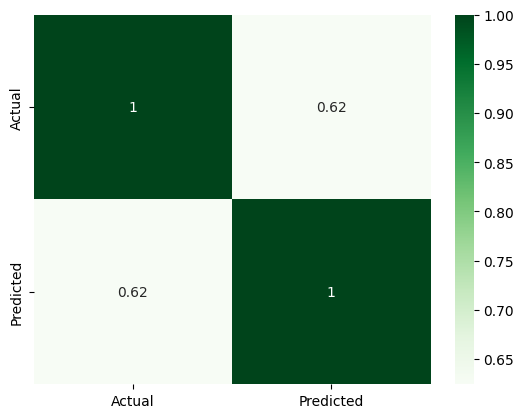

In [82]:
sns.heatmap(final.corr(), annot= True, cmap= "Greens")

Performance Matrics

In [ ]:
confusion_matrix(y_test, y_pred)
#[TP,FN]
#[FP,TN]

array([[98, 11],
       [20, 48]])

accuracy = (98+48)/total

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.81      0.71      0.76        68

    accuracy                           0.82       177
   macro avg       0.82      0.80      0.81       177
weighted avg       0.82      0.82      0.82       177



In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8248587570621468

Exportation of model (DUMPING) And data set

Module -> Pickel

Serialisation - Deserialisation 

Dumping - Undumping

Pickling - Unpicking

In [89]:
import pickle

In [91]:
pick = pickle.dumps(model)

In [93]:
unpickel = pickle.loads(pick)